<a href="https://colab.research.google.com/github/SebasGx-Git/Landing-Page-Patrones/blob/main/Respuesta_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Librerias y funciones anexas

In [1]:
import graphviz as gv
import numpy as np
import pandas as pd

In [2]:
def readAdjl(fn, haslabels=False, weighted=False, sep="|"):
  with open(fn) as f:
    labels = None
    if haslabels:
      labels = f.readline().strip().split()
    L = []
    for line in f:
      if weighted:
        L.append([tuple(map(int, p.split(sep))) for p in line.strip().split()])
        # line => "1|3 2|5 4|4" ==> [(1, 3), (2, 5), (4, 4)]
      else: 
        L.append(list(map(int, line.strip().split()))) # "1 3 5" => [1, 3, 5]
        # L.append([int(x) for x in line.strip().split()])
  return L, labels

def adjlShow(L, labels=None, directed=False, weighted=False, path=[],
             layout="sfdp"):
  g = gv.Digraph("G") if directed else gv.Graph("G")
  g.graph_attr["layout"] = layout
  g.edge_attr["color"] = "gray"
  g.node_attr["color"] = "orangered"
  g.node_attr["width"] = "0.1"
  g.node_attr["height"] = "0.1"
  g.node_attr["fontsize"] = "8"
  g.node_attr["fontcolor"] = "mediumslateblue"
  g.node_attr["fontname"] = "monospace"
  g.edge_attr["fontsize"] = "8"
  g.edge_attr["fontname"] = "monospace"
  n = len(L)
  for u in range(n):
    g.node(str(u), labels[u] if labels else str(u))
  added = set()
  for v, u in enumerate(path):
    if u != None:
      if weighted:
        for vi, w in G[u]:
          if vi == v:
            break
        g.edge(str(u), str(v), str(w), dir="forward", penwidth="2", color="orange")
      else:
        g.edge(str(u), str(v), dir="forward", penwidth="2", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  if weighted:
    for u in range(n):
      for v, w in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v), str(w))
        elif directed:
          g.edge(str(u), str(v), str(w))
  else:
    for u in range(n):
      for v in L[u]:
        if not directed and not f"{u},{v}" in added:
          added.add(f"{u},{v}")
          added.add(f"{v},{u}")
          g.edge(str(u), str(v))
        elif directed:
          g.edge(str(u), str(v))
  return g

## El Ordenamiento topologico basicamente devuelve una lista de presedentes en un grafo. En un caso facil, si tenemos una lista de procedimientos, el orden topologicos, nos devuelve en que orden debemos resolver esa lista para cumplir todos estos procedimientos .

## Como podemos suponer este orden no puede ser ciclico (A->B, B->C, C->A) por que surge la duda de : ¿Cual se resuelve primero?

## En base a esto colocaremos un caso de ejemplo sobre la resolución de este ordenamiento topologico.

In [6]:
def topoSort(G):
  n = len(G)
  visited = [False]*n
  ts = []

  def dfs(u):
    if not visited[u]:
      visited[u] = True
      for v in G[u]:
        if not visited[v]:
          dfs(v)
      ts.append(u)

  for u in range(n):
    dfs(u)

  return ts

In [3]:
%%file 1.in
pants belt tshirt watch socks shoes undies
1 2
0 3 
1 4 0
2 0 3 
1 0 1
6 3 
5 1

Writing 1.in


## En un caso no ciclico, el orden para vestirse sería: undies-> socks -> pants -> shoes -> tshirt -> watch. Sin embargo como no hay un orden establecido, podemos ver que esto devolvera un orden que no deseamos

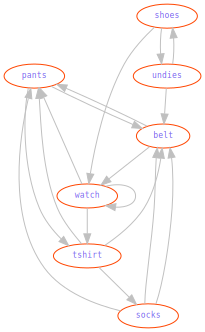

In [5]:
G, labels = readAdjl("1.in", haslabels=True)
adjlShow(G, labels=labels, directed=True, layout="dot")

In [7]:
ts = topoSort(G)
print(list(reversed([labels[u] for u in ts])))

['shoes', 'undies', 'pants', 'belt', 'watch', 'tshirt', 'socks']


## Como podemos observar, el codigo funciona correctamente, sin embargo no se obtiene un orden de precedentes ya que este grafo presenta ciclos